## What type of customers are likely to leave us?

This data set was provided by BlastChar on Kaggle https://www.kaggle.com/blastchar/telco-customer-churn

This machine learning model will determine if a customer is likely to leave the business based on a few features in the dataset.

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings 
warnings.simplefilter('ignore')

In [2]:
# Get the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.fillna(0, inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Review the data

In [3]:
## Check the shape 
df.shape

(7043, 21)

In [4]:
## Drop duplicates
df = df.drop_duplicates(keep= 'first')

In [5]:
df.shape

(7043, 21)

In [6]:
## Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
## Check the stats
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
## Find how many null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
## Find how many unique values
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [10]:
## Find the unique values in the tenure column
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

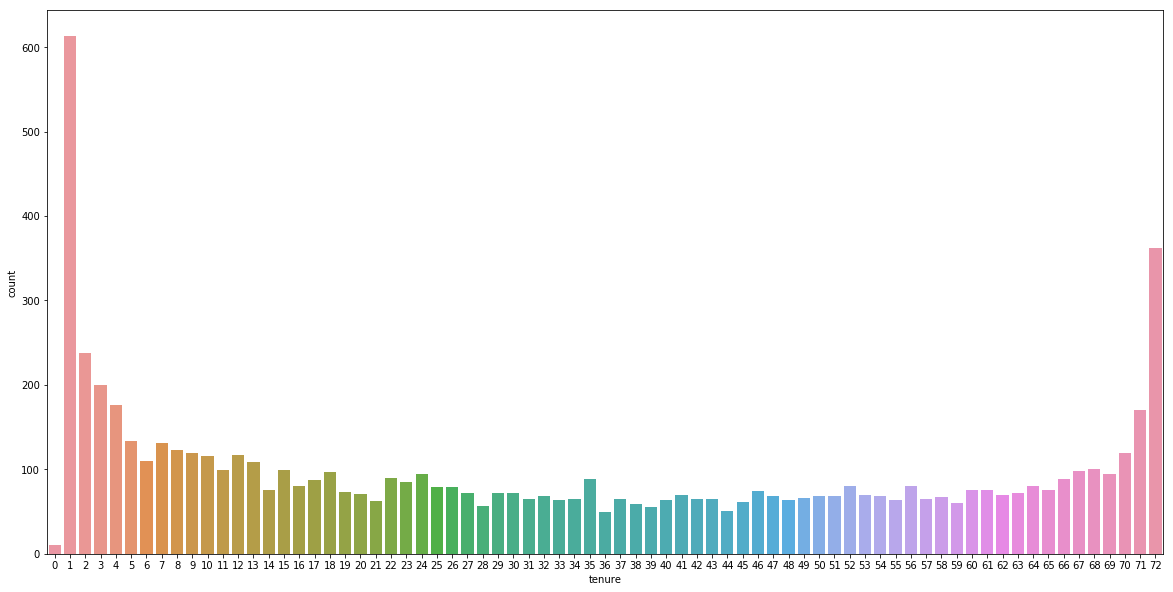

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df['tenure'], ax=ax)

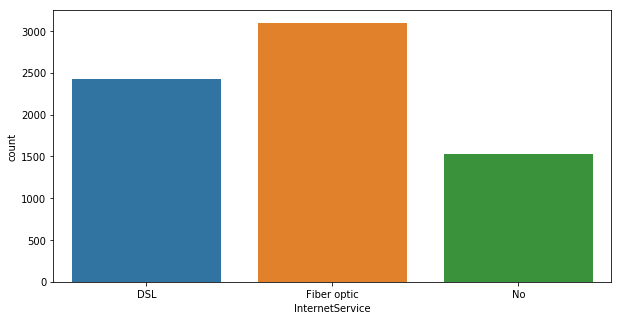

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['InternetService'], ax=ax)

In [13]:
# Review the columns again
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

#### Prepare the data so we can perform machine learning techniques

In [15]:
#Pre-Process Data

df['gender'] = np.where(df['gender']=='Male',1,0)
df['Dependents'] = np.where(df['Dependents']=='Yes',1,0)
df['Partner'] = np.where(df['Partner']=='Yes',1,0)
df['PhoneService'] = np.where(df['PhoneService']=='Yes',1,0)
df['OnlineSecurity'] = np.where((df['OnlineSecurity']=='No') | (df['OnlineSecurity']=='No internet service'),0,1)
df['MultipleLines'] = np.where((df['MultipleLines']=='No') | (df['MultipleLines']=='No internet service'),0,1)
df['OnlineBackup'] = np.where((df['OnlineBackup']=='No') | (df['OnlineBackup']=='No internet service'),0,1)
df['DeviceProtection'] = np.where((df['DeviceProtection']=='No') | (df['DeviceProtection']=='No internet service'),0,1)
df['TechSupport'] = np.where((df['TechSupport']=='No') | (df['TechSupport']=='No internet service'),0,1)
df['StreamingTV'] = np.where((df['StreamingTV']=='No') | (df['StreamingTV']=='No internet service'),0,1)
df['StreamingMovies'] = np.where((df['StreamingMovies']=='No') | (df['StreamingMovies']=='No internet service'),0,1)
df['PaperlessBilling'] = np.where(df['PaperlessBilling']=='Yes',1,0)
df['Churn'] = np.where(df['Churn']=='Yes',1,0)

contract = pd.get_dummies(df.Contract, prefix='Contract')
Paymethod = pd.get_dummies(df.PaymentMethod, prefix='Payment method: ')
IS = pd.get_dummies(df.InternetService, prefix='Internet Service: ')



df = pd.concat([df, contract, Paymethod, IS],axis=1)

df.drop(['customerID', 'Contract','PaymentMethod','InternetService'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment method: _Bank transfer (automatic),Payment method: _Credit card (automatic),Payment method: _Electronic check,Payment method: _Mailed check,Internet Service: _DSL,Internet Service: _Fiber optic,Internet Service: _No
0,0,0,1,0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,45,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [16]:
## Review data to see if variables are numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
gender                                        7043 non-null int32
SeniorCitizen                                 7043 non-null int64
Partner                                       7043 non-null int32
Dependents                                    7043 non-null int32
tenure                                        7043 non-null int64
PhoneService                                  7043 non-null int32
MultipleLines                                 7043 non-null int32
OnlineSecurity                                7043 non-null int32
OnlineBackup                                  7043 non-null int32
DeviceProtection                              7043 non-null int32
TechSupport                                   7043 non-null int32
StreamingTV                                   7043 non-null int32
StreamingMovies                               7043 non-null int32
PaperlessBilling                   

In [17]:
## Only look for the columns with numbers
df_num = df.select_dtypes(include = ['float64', 'int64', 'uint8', 'int32'])

In [18]:
## See all the correlations against other features
df.corr(method='pearson')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment method: _Bank transfer (automatic),Payment method: _Credit card (automatic),Payment method: _Electronic check,Payment method: _Mailed check,Internet Service: _DSL,Internet Service: _Fiber optic,Internet Service: _No
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.004476,-0.017021,-0.013773,-0.002105,...,-0.003386,0.008026,-0.003695,-0.016024,0.001215,0.000752,0.013744,0.006568,-0.011286,0.006026
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.136213,-0.038653,0.066572,0.059428,...,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477,-0.108322,0.255338,-0.182742
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.129929,0.143106,0.141498,0.153786,...,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125,-0.000851,0.000304,0.000615
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.023198,0.080972,0.023671,0.013963,...,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071,0.052010,-0.165818,0.139812
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.323088,0.327203,0.360277,0.360653,...,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852,0.013274,0.019720,-0.039062
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.315431,-0.092893,-0.052312,-0.071227,...,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319,-0.452425,0.289999,0.172209
MultipleLines,-0.004476,0.136213,0.129929,-0.023198,0.323088,-0.315431,1.000000,0.151950,0.230852,0.240960,...,-0.086740,-0.002098,0.102937,0.070178,0.063921,0.080836,-0.222605,0.070179,0.190192,-0.310046
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.151950,1.000000,0.283832,0.275438,...,-0.246679,0.100162,0.191773,0.095158,0.115721,-0.112338,-0.080798,0.321269,-0.030696,-0.333403
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.230852,0.283832,1.000000,0.303546,...,-0.164172,0.083722,0.111400,0.087004,0.090785,-0.000408,-0.174164,0.157884,0.165651,-0.381593
DeviceProtection,-0.002105,0.059428,0.153786,0.013963,0.360653,-0.071227,0.240960,0.275438,0.303546,1.000000,...,-0.225662,0.102495,0.165096,0.083115,0.111554,-0.003351,-0.187373,0.146291,0.176049,-0.380754


#### A lot of numbers above, time to review visually

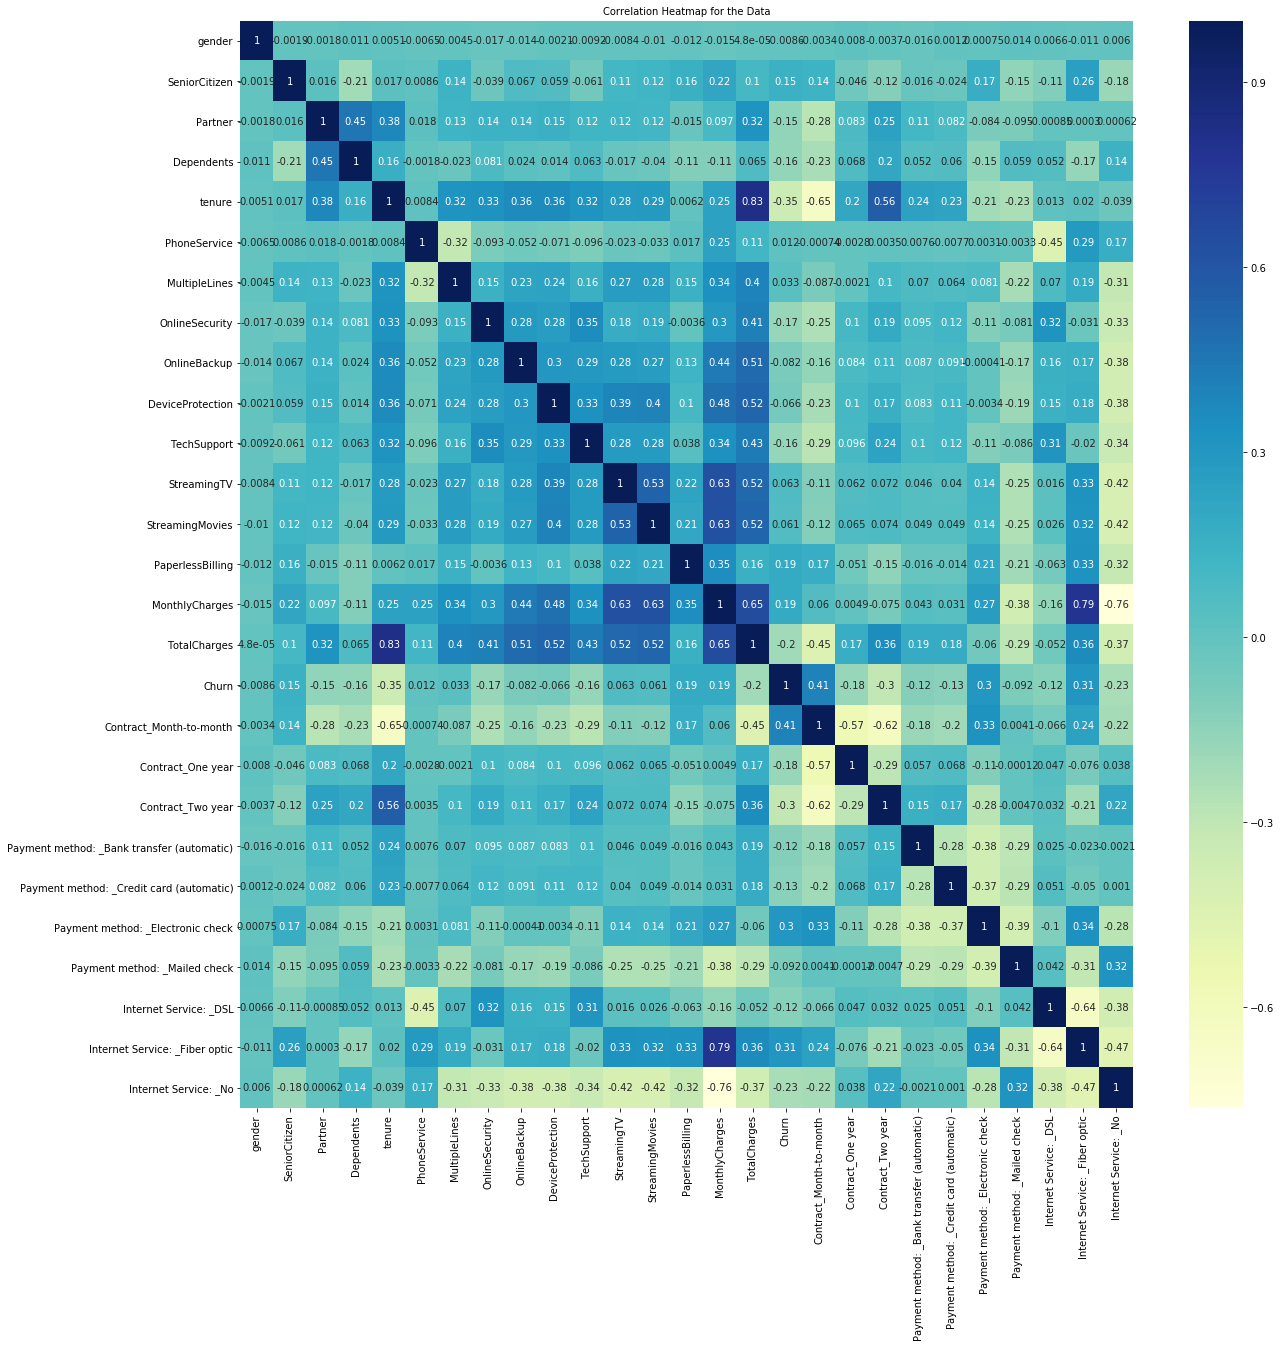

In [19]:
## Heat Map of correlations

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True, ax=ax)
plt.title('Correlation Heatmap for the Data', fontsize = 10)
plt.show()

### Machine Learning time...

In [20]:
#Split data into training and test data sets

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

y_train = train['Churn']
y_test = test['Churn']

X_train = train.drop(['Churn'], axis=1)
X_test = test.drop(['Churn'], axis=1)


In [21]:
X_train.isnull().sum()

gender                                        0
SeniorCitizen                                 0
Partner                                       0
Dependents                                    0
tenure                                        0
PhoneService                                  0
MultipleLines                                 0
OnlineSecurity                                0
OnlineBackup                                  0
DeviceProtection                              0
TechSupport                                   0
StreamingTV                                   0
StreamingMovies                               0
PaperlessBilling                              0
MonthlyCharges                                0
TotalCharges                                  9
Contract_Month-to-month                       0
Contract_One year                             0
Contract_Two year                             0
Payment method: _Bank transfer (automatic)    0
Payment method: _Credit card (automatic)

In [22]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection, tree, preprocessing, metrics, linear_model


def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv


# Random Forest Classifier ----------------------------------------------------------------

train_pred_log, acc_log, acc_cv_rfor = fit_ml_algo(RandomForestClassifier(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

# Logistic Regression ---------------------------------------------------------------------

train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)


# K-Nearest Neighbours --------------------------------------------------------------------

train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)


# Gaussian Naive Bayes --------------------------------------------------------------------

train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)

# Linear SVC --------------------------------------------------------------------------------

train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)

# Stochastic Gradient Descent ----------------------------------------------------------------

train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)

# Decision Tree Classifier ------------------------------------------------------------------

train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)

# Gradient Boosting Trees -------------------------------------------------------------------

train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)

#### The charges and tenure appear to be important when predicting churn - "Price sensitive customers"

Text(0.5, 0, 'Importance')

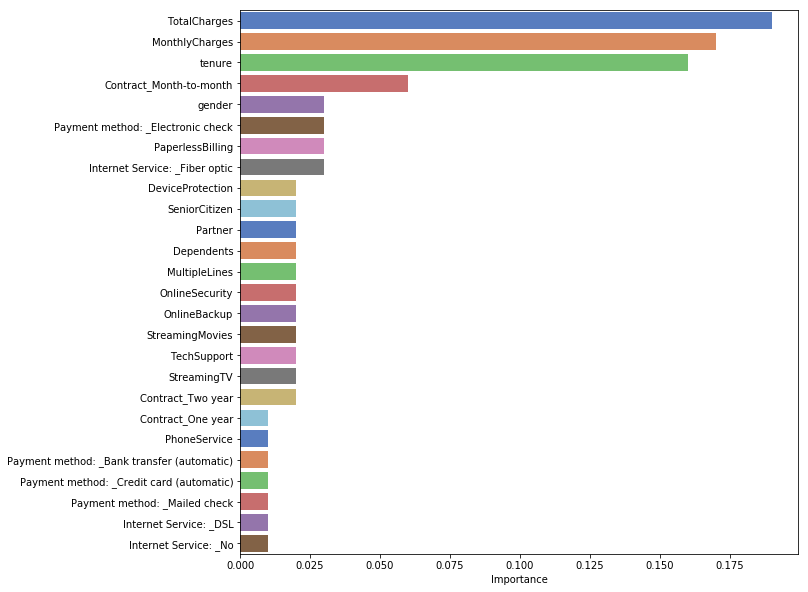

In [24]:
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)

f_im = clf.feature_importances_.round(2)
rank = pd.Series(f_im, index=X_train.columns).sort_values(ascending=False)

figsize = [10.0, 10.0]

plt.figure(figsize=figsize)
sns.barplot(y=rank.index,x=rank.values,palette='muted')
plt.xlabel('Importance')

In [25]:
models = pd.DataFrame({
    'Model': ['RandomForestClassifier', 'KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_rfor,
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
print("---Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Accuracy Scores---


,Model,Score
6,Decision Tree,99.75
1,KNN,83.21
7,Gradient Boosting Trees,83.08
2,Logistic Regression,80.62
5,Linear SVC,79.61
0,RandomForestClassifier,77.90
4,Stochastic Gradient Decent,75.81
3,Naive Bayes,74.49


In [26]:
# Cross-Validation Accuracy Scores ------------------------------------------------------------------

cv_models = pd.DataFrame({
    'Model': ['RandomForestClassifier', 'KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_rfor,
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
2,Logistic Regression,80.37
7,Gradient Boosting Trees,80.26
0,RandomForestClassifier,77.90
1,KNN,76.39
3,Naive Bayes,74.19
4,Stochastic Gradient Decent,73.55
6,Decision Tree,72.45
5,Linear SVC,68.85


In [27]:
#Choose model

X_train.rename(columns={'Contract_Month-to-month': 'Contract_Month_to_month'}, inplace=True)

X_train = np.array(X_train[['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract_Month_to_month']])

y_train = np.array(y_train)

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
model = gb.fit(X_train, y_train)


print("The accuracy score is: ", round(model.score(X_train, y_train) * 100, 2))



The accuracy score is:  80.01


#### Predicting if customers will stay or leave based on how much they spend, how long have they been a customer for and if they are on a month to month contract or not

In [28]:
## function to predict churn

def churn_or_not(TotalCharges, MonthlyCharges, tenure, Contract_Month_to_month):
    if(model.predict([[TotalCharges, MonthlyCharges, tenure, Contract_Month_to_month]]))==0:
        print('Will probably keep customer')
    else:
        print('Will probably lose customer')

#Predict test
churn_or_not(1000, 100, 1, 1)
print("The accuracy score is: ", round(model.score(X_train, y_train) * 100, 2),"%")

Will probably lose customer
The accuracy score is:  80.01 %
